In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples
num_samples = 1000

# Generate random customer data
data = pd.DataFrame({
    'CustomerID': ['CUST' + str(i).zfill(4) for i in range(1, num_samples + 1)],
    'Tenure': np.random.randint(1, 72, num_samples),  # Months
    'MonthlyCharges': np.round(np.random.uniform(20, 120, num_samples), 2),  # Monthly bill
    'TotalCharges': np.round(np.random.uniform(100, 8000, num_samples), 2),  # Total spent
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], num_samples),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], num_samples),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], num_samples),
    'OnlineSecurity': np.random.choice(['Yes', 'No'], num_samples),
    'TechSupport': np.random.choice(['Yes', 'No'], num_samples),
    'Churn': np.random.choice(['Yes', 'No'], num_samples, p=[0.3, 0.7])  # 30% churn rate
})

# Save dataset to CSV
data.to_csv('telecom_churn.csv', index=False)

# Load the dataset
data = pd.read_csv('telecom_churn.csv')

# Drop 'CustomerID' as it’s not a useful feature for prediction
data = data.drop(columns=['CustomerID'])

# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Handle missing values (if any)
data = data.fillna(method='ffill')  # Replace with appropriate strategy

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Define feature set (X) and target (y)
X = data.drop(columns=['Churn'])  # Replace 'Churn' with the name of your target column
y = data['Churn']

# Normalize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
# 1. Overall Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

# 2. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 3. Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Retained', 'Churned'])
print("\nClassification Report:")
print(class_report)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21116\2655700509.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Replace with appropriate strategy


Overall Accuracy: 0.69

Confusion Matrix:
[[132   6]
 [ 57   5]]

Classification Report:
              precision    recall  f1-score   support

    Retained       0.70      0.96      0.81       138
     Churned       0.45      0.08      0.14        62

    accuracy                           0.69       200
   macro avg       0.58      0.52      0.47       200
weighted avg       0.62      0.69      0.60       200



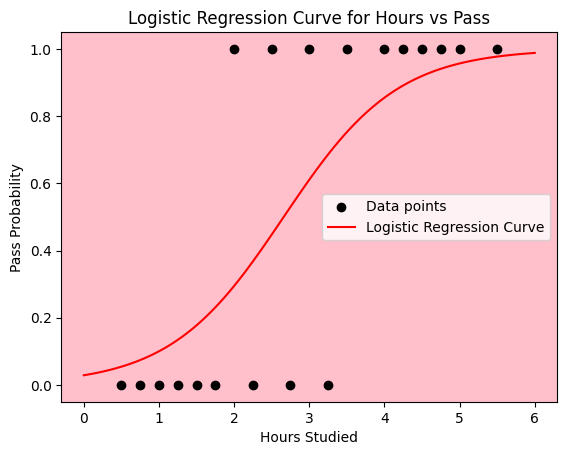

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Given dataset
hours = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]).reshape(-1, 1)
pass_exam = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

# Fit logistic regression model
model = LogisticRegression()
model.fit(hours, pass_exam)

# Generate values for plotting
x_values = np.linspace(0, 6, 100).reshape(-1, 1)
y_prob = model.predict_proba(x_values)[:, 1]

# Plot the data points and logistic curve
plt.scatter(hours, pass_exam, color='black', label='Data points')
plt.plot(x_values, y_prob, color='red', label='Logistic Regression Curve')
plt.gca().set_facecolor('pink')
plt.xlabel("Hours Studied")
plt.ylabel("Pass Probability")
plt.title("Logistic Regression Curve for Hours vs Pass")
plt.legend()
plt.show()